# Определение перспективного тарифа для телеком компании

Компания «Мегалайн» — федеральный оператор сотовой связи - предлагает клиентас два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.
Описание тарифов:

Тариф «Смарт»:

    Ежемесячная плата: 550 рублей
    Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    
    Стоимость услуг сверх тарифного пакета:

    минута разговора: 3 рубля
    сообщение: 3 рубля
    1 Гб интернет-трафика: 200 рублей

Тариф «Ультра»:

    Ежемесячная плата: 1950 рублей
    Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    
    Стоимость услуг сверх тарифного пакета:

    минута разговора: 1 рубль
    сообщение: 1 рубль
    1 Гб интернет-трафика: 150 рублей
    
План:

1. Подготовить данные.

    - привести данные к нужным типам;
    - найти и исправить ошибки в данных.

2. Посчитать для каждого пользователя:

    - количество сделанных звонков и израсходованных минут разговора по месяцам;
    - количество отправленных сообщений по месяцам;
    - объем израсходованного интернет-трафика по месяцам;
    - помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

3. Проанализировать данные и описать поведение клиентов оператора, исходя из выборки: 
    - Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?;
    - Посчитать среднее количество, дисперсию и стандартное отклонение; 
    - Построить гистограммы; 
    - Описать распределения.

4. Проверить гипотезы:

    - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается;
    - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов;

5. Пояснить:

    - как мы формулировали нулевую и альтернативную гипотезы;
    - какой критерий использовали для проверки гипотез и почему.

6. Написать общий вывод.


Описание данных

Таблица users (информация о пользователях):

    user_id — уникальный идентификатор пользователя
    first_name — имя пользователя
    last_name — фамилия пользователя
    age — возраст пользователя (годы)
    reg_date — дата подключения тарифа (день, месяц, год)
    churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    city — город проживания пользователя
    tariff — название тарифного плана

Таблица calls (информация о звонках):

    id — уникальный номер звонка
    call_date — дата звонка
    duration — длительность звонка в минутах
    user_id — идентификатор пользователя, сделавшего звонок

Таблица messages (информация о сообщениях):

    id — уникальный номер сообщения
    message_date — дата сообщения
    user_id — идентификатор пользователя, отправившего сообщение

Таблица internet (информация об интернет-сессиях):

    id — уникальный номер сессии
    mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
    session_date — дата интернет-сессии
    user_id — идентификатор пользователя

Таблица tariffs (информация о тарифах):

    tariff_name — название тарифа
    rub_monthly_fee — ежемесячная абонентская плата в рублях
    minutes_included — количество минут разговора в месяц, включённых в абонентскую плату
    messages_included — количество сообщений в месяц, включённых в абонентскую плату
    mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
    rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
    rub_per_message — стоимость отправки сообщения сверх тарифного пакета
    rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)



# Шаг 1. Откройте файл с данными и изучите общую информацию и 
параллельно Шаг 2. Подготовьте данные.

Импортируем все необходимые библиотеки и открываем датасеты, присваивая им имена.

In [327]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

In [328]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

Анализируем датасеты. Начинаем со звонков. Сначала общая информация.

In [329]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


202607 строк, пропуски во всех столбцах отсутствуют. Теперь первые 20 строк.

In [330]:
calls.head(20)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


Так как id пишется через нижнее подчеркивание, то заменить тип данных здесь не получится. 
User_id уже нам подходит. Остается call_date, приведем его к временному типу.

In [331]:
calls['call_date'] = pd.to_datetime(calls['call_date'],format='%Y.%m.%d')

Проверим.

In [332]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [333]:
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


Округлим значения в столбце duration вверх до целого числа, согласно правилам оператора.

In [334]:
calls['duration'] = calls['duration'].apply(np.ceil)
calls

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1.0,1499
202603,1499_216,2018-10-18,19.0,1499
202604,1499_217,2018-11-10,11.0,1499
202605,1499_218,2018-10-06,5.0,1499


Теперь можно перевести значения в столбце duration к целочисленным.

In [335]:
calls['duration'] = calls['duration'].astype('int')

В столбце duration есть нулевые значения, которые видимо обозначают пропущенные вызовы. 

In [336]:
calls.query('duration == 0')

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0,1000
1,1000_1,2018-08-17,0,1000
5,1000_5,2018-11-02,0,1000
6,1000_6,2018-10-18,0,1000
9,1000_9,2018-08-15,0,1000
...,...,...,...,...
202590,1499_203,2018-12-03,0,1499
202592,1499_205,2018-10-13,0,1499
202593,1499_206,2018-12-26,0,1499
202594,1499_207,2018-10-28,0,1499


39613 звонков без разговоров. Причин для этого может быть много - от попытки звонка, но обрыва сети, до внезапно севшего телефона. Комментариев от заказчика по этому поводу не было, запросить их тоже не получится. Оставляем как есть.

Проверим на дубликаты.

In [337]:
calls.duplicated().sum()

0

Дубликатов нет. 

Теперь интернет.

In [338]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


149396 строк, все столбцы без пропусков, один неназванный столбец, столбец session_date требует замены типа.

In [339]:
internet

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


Неназванный столбец дублирует id строки в этой таблице. Сделаем его столбцом id.

In [340]:
internet = pd.read_csv('/Users/antonbogdanov/Downloads/internet.csv', index_col=0)

Mb_used и id не привести к целым числам.
Но для дальнейшего анализа можно добавить столбец gb_used в гигабайтах. 

In [341]:
internet['gb_used'] = internet['mb_used']/1024
internet

,id,mb_used,session_date,user_id,gb_used
0,1000_0,112.95,2018-11-25,1000,0.110303
1,1000_1,1052.81,2018-09-07,1000,1.028135
2,1000_2,1197.26,2018-06-25,1000,1.169199
3,1000_3,550.27,2018-08-22,1000,0.537373
4,1000_4,302.56,2018-09-24,1000,0.295469
...,...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499,0.311426
149392,1499_153,490.13,2018-12-14,1499,0.478643
149393,1499_154,0.00,2018-10-27,1499,0.000000
149394,1499_155,1246.32,2018-11-26,1499,1.217109


Заменим тип данных в столбце session_date.

In [342]:
internet['session_date'] = pd.to_datetime(internet['session_date'],format='%Y.%m.%d')

Проверим.

In [343]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
 4   gb_used       149396 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 6.8+ MB


Есть ли дубликаты?

In [344]:
internet.duplicated().sum()

0

Дубликатов нет.

Проверим на нули.

In [345]:
internet.query('gb_used == 0')

,id,mb_used,session_date,user_id,gb_used
11,1000_11,0.0,2018-08-28,1000,0.0
38,1000_38,0.0,2018-11-27,1000,0.0
46,1000_46,0.0,2018-06-30,1000,0.0
67,1000_67,0.0,2018-06-16,1000,0.0
72,1000_72,0.0,2018-06-15,1000,0.0
...,...,...,...,...,...
149380,1499_141,0.0,2018-12-11,1499,0.0
149381,1499_142,0.0,2018-11-01,1499,0.0
149383,1499_144,0.0,2018-11-27,1499,0.0
149386,1499_147,0.0,2018-10-21,1499,0.0


19598 нулевых интернет сессий. Предположительно это означает либо обрыв соединения, либо потерю сети, либо внезапное выключение телефона. В принципе причин может быть очень много и без комментария заказчика здесь сложно как-то действовать. Поэтому будем бездействовать - оставим нули.

Далее messages.

In [346]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


123036 строк, три столбца без пропусков. Видимо требуется замена данных в message_date.

In [347]:
messages

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [348]:
messages['message_date'] = pd.to_datetime(messages['message_date'],format='%Y.%m.%d')

Проверим.

In [349]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


Есть ли дубликаты?

In [350]:
messages.duplicated().sum()

0

Дубликатов нет.

Теперь тарифы.

In [351]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


2 строки, 8 столбцов, пропусков нет. Кажется, что все типы данных подходят. 

In [352]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Для дальнейшего анализа переведем значения в столбце mb_per_month_included в гигабайты, поделив их на 1024.

In [353]:
tariffs['mb_per_month_included'] = tariffs['mb_per_month_included']/1024
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15.0,500,550,200,3,3,smart
1,1000,30.0,3000,1950,150,1,1,ultra


Переименуем столбец mb_per_month_included.

In [354]:
tariffs.rename(columns={'mb_per_month_included': 'gb_per_month_included'}, inplace=True)
tariffs

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15.0,500,550,200,3,3,smart
1,1000,30.0,3000,1950,150,1,1,ultra


Дубликатов очевидно нет.

Остались users.

In [355]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


500 строк, 8 столбцов, в столбце churn_date пропуски, но они означают, что тариф еще действует.

In [356]:
users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


Столбец reg_date приведем к датированному типу.

In [357]:
users['reg_date'] = pd.to_datetime(users['reg_date'],format='%Y.%m.%d')

Проверим столбец age на ошибки.

In [358]:
users.query('age < 18 and age > 80').sum()

user_id       0.0
age           0.0
churn_date    0.0
city          0.0
first_name    0.0
last_name     0.0
reg_date      0.0
tariff        0.0
dtype: float64

Необычных значений нет.

Теперь столбец city проверим на дублирующиеся значения.

In [359]:
users['city'].nunique()

76

76 уникальных значений. Проведем категоризацию.

In [360]:
def loc_name(row):
    for index, letter in enumerate(row['city']):
        if letter.isupper():
            row.city = row.city[index:]
            break
    return row

Применим ее.

In [361]:
users = users.apply(loc_name, axis=1)

Проверим себя.

In [362]:
users['city'].nunique()

76

Также 76. Значит со столбцом все было в порядке.

Есть ли дубликаты?

In [363]:
users.duplicated().sum()

0

Их нет.

Теперь займемся подсчетом необходимых данных. В первую очередь посчитаем количество 
сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя.
Для этого обратимся к таблице calls.
Внесем туда столбец month, обозначающий месяц, в котором произошел разговор.

In [364]:
calls['month'] = calls['call_date'].dt.month

Проверим.

In [365]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 7.7+ MB


In [366]:
calls

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,12
202603,1499_216,2018-10-18,19,1499,10
202604,1499_217,2018-11-10,11,1499,11
202605,1499_218,2018-10-06,5,1499,10


Отлично. Теперь создадим сводную таблицу user_call_calculation.

In [367]:
user_call_calculation = (calls.
        groupby(['user_id', 'month']).agg({'duration':['count','sum']}).sort_values(by = ['user_id', 'month']))

Посмотрим на таблицу.

In [368]:
user_call_calculation

duration     
                 count  sum
user_id month              
1000    5           22  159
        6           43  172
        7           47  340
        8           52  408
        9           58  466
...                ...  ...
1498    10          41  247
1499    9            9   70
        10          68  449
        11          74  612
        12          69  492

[3174 rows x 2 columns]

In [369]:
user_call_calculation.describe()

duration             
             count          sum
count  3174.000000  3174.000000
mean     63.833333   456.931632
std      32.678036   238.031270
min       1.000000     0.000000
25%      41.000000   290.000000
50%      63.000000   447.000000
75%      83.000000   592.000000
max     244.000000  1673.000000

Теперь посчитаем количество отправленных сообщений по месяцам для каждого абонента.
Обратимся к таблице messages. Создадим столбец month, обозначающий месяц, в котором было отправлено смс.

In [370]:
messages['month'] = messages['message_date'].dt.month

Проверим.

In [371]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
 3   month         123036 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


In [372]:
messages

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


Теперь построим сводную таблицу user_message_calculation.

In [373]:
user_message_calculation = (messages
        .groupby(['user_id', 'month']).agg({'id':'count'}).sort_values(by = ['user_id', 'month']))

Посмотрим на таблицу.

In [374]:
user_message_calculation

id
user_id month    
1000    5      22
        6      60
        7      75
        8      81
        9      57
...            ..
1498    10     42
1499    9      11
        10     48
        11     59
        12     66

[2717 rows x 1 columns]

In [375]:
user_message_calculation.describe()

,id
count,2717.000000
mean,45.283769
std,35.051363
min,1.000000
25%,19.000000
50%,38.000000
75%,63.000000
max,224.000000


Посчитаем объем израсходованного интернет-трафика по месяцам для каждого абонента.
Обратимся к таблице internet и создадим там столбец month, в котором укажем месяц соединения.

In [376]:
internet['month'] = internet['session_date'].dt.month

Проверим.

In [377]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            149396 non-null  object        
 1   mb_used       149396 non-null  float64       
 2   session_date  149396 non-null  datetime64[ns]
 3   user_id       149396 non-null  int64         
 4   gb_used       149396 non-null  float64       
 5   month         149396 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 8.0+ MB


In [378]:
internet

,id,mb_used,session_date,user_id,gb_used,month
0,1000_0,112.95,2018-11-25,1000,0.110303,11
1,1000_1,1052.81,2018-09-07,1000,1.028135,9
2,1000_2,1197.26,2018-06-25,1000,1.169199,6
3,1000_3,550.27,2018-08-22,1000,0.537373,8
4,1000_4,302.56,2018-09-24,1000,0.295469,9
...,...,...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499,0.311426,10
149392,1499_153,490.13,2018-12-14,1499,0.478643,12
149393,1499_154,0.00,2018-10-27,1499,0.000000,10
149394,1499_155,1246.32,2018-11-26,1499,1.217109,11


Теперь создадим сводную таблицу user_internet_calculation.

In [379]:
user_internet_calculation = (internet
    .groupby(['user_id', 'month']).agg({'gb_used':'sum'}).sort_values(by = ['user_id', 'month']))

Посмотрим на нее.

In [380]:
user_internet_calculation

gb_used
user_id month           
1000    5       2.200674
        6      22.689229
        7      13.675430
        8      13.726494
        9      14.227451
...                  ...
1498    10     20.097031
1499    9       1.802490
        10     17.371592
        11     17.542295
        12     12.749590

[3203 rows x 1 columns]

Окргулим значения вверх, согласно политике оператора, в столбце gb_used до целых чисел.

In [381]:
user_internet_calculation['gb_used'] = user_internet_calculation['gb_used'].apply(np.ceil)

Значения в столбцe gd_used приведем к int.

In [382]:
user_internet_calculation['gb_used'] = user_internet_calculation['gb_used'].astype('int')
user_internet_calculation

gb_used
user_id month         
1000    5            3
        6           23
        7           14
        8           14
        9           15
...                ...
1498    10          21
1499    9            2
        10          18
        11          18
        12          13

[3203 rows x 1 columns]

In [383]:
user_internet_calculation.describe()

,gb_used
count,3203.000000
mean,17.358414
std,7.343379
min,0.000000
25%,13.000000
50%,17.000000
75%,21.000000
max,49.000000


Теперь необходимо найти помесячную выручку с каждого пользователя 
Для этого попробуем соединить данные в одну таблицу.

In [384]:
total_calculation = (user_call_calculation
                .merge(user_internet_calculation,on = ['user_id', 'month'],how = 'outer')
                .merge(user_message_calculation,on = ['user_id', 'month'],how = 'outer')
                .merge(users, on = 'user_id', how = 'outer'))
total_calculation

/Users/antonbogdanov/opt/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,user_id,"(duration, count)","(duration, sum)",gb_used,id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,22.0,159.0,3.0,22.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,43.0,172.0,23.0,60.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,47.0,340.0,14.0,75.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,52.0,408.0,14.0,81.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,58.0,466.0,15.0,57.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,NaN,NaN,20.0,21.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3212,1489,NaN,NaN,18.0,20.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3213,1489,NaN,NaN,17.0,35.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3214,1128,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra


Переименуем столбцы для удобства.

In [385]:
total_calculation.set_axis(['user_id',
        'call_amount','call_duration','gb_used','sms_sent', 'age', 'churn_date', 'city', 
        'first_name', 'last_name', 'reg_date', 'tariff_name'],axis='columns',inplace=True)
total_calculation

,user_id,call_amount,call_duration,gb_used,sms_sent,age,churn_date,city,first_name,last_name,reg_date,tariff_name
0,1000,22.0,159.0,3.0,22.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,43.0,172.0,23.0,60.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,47.0,340.0,14.0,75.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,52.0,408.0,14.0,81.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,58.0,466.0,15.0,57.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,NaN,NaN,20.0,21.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3212,1489,NaN,NaN,18.0,20.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3213,1489,NaN,NaN,17.0,35.0,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3214,1128,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra


Добавим параметры тарифов. 

In [386]:
total_calculation = pd.merge(total_calculation, tariffs, on = 'tariff_name', how='outer')

Проверим.

In [387]:
total_calculation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                3216 non-null   int64         
 1   call_amount            3174 non-null   float64       
 2   call_duration          3174 non-null   float64       
 3   gb_used                3203 non-null   float64       
 4   sms_sent               2717 non-null   float64       
 5   age                    3216 non-null   int64         
 6   churn_date             189 non-null    object        
 7   city                   3216 non-null   object        
 8   first_name             3216 non-null   object        
 9   last_name              3216 non-null   object        
 10  reg_date               3216 non-null   datetime64[ns]
 11  tariff_name            3216 non-null   object        
 12  messages_included      3216 non-null   int64         
 13  gb_

В столбцах call_amount, call_duration, gb_used и sms_sent появились пропуски, которые сигнализируют о том, что абоненты не пользовались
этой услугой. Соответственно можно без проблем заполнить пропуски нулями.

In [388]:
total_calculation['call_amount'] = total_calculation['call_amount'].fillna(0) 
total_calculation['call_duration'] = total_calculation['call_duration'].fillna(0) 
total_calculation['gb_used'] = total_calculation['gb_used'].fillna(0) 
total_calculation['sms_sent'] = total_calculation['sms_sent'].fillna(0) 

Напишем функции для подсчета ежемесячной выручки по каждому абоненту по всем направлениям связи.


In [389]:
def user_call_revenue(row):
    if row['call_duration'] > row['minutes_included']:
        return (row['call_duration'] - row['minutes_included'])*row['rub_per_minute']
    else:
        return 0

def user_gb_revenue(row):
    if row['gb_used'] > row['gb_per_month_included']:
        return (row['gb_used'] - row['gb_per_month_included'])*row['rub_per_gb']
    else:
        return 0

def user_sms_revenue(row):
    if row['sms_sent'] > row['messages_included']:
        return (row['sms_sent'] - row['messages_included'])*row['rub_per_message']
    else:
        return 0

Применим функици. 

In [390]:
total_calculation['call_revenue'] = total_calculation.apply(user_call_revenue, axis=1).astype('int')
total_calculation['gb_revenue'] = total_calculation.apply(user_gb_revenue, axis=1).astype('int')
total_calculation['sms_revenue'] = total_calculation.apply(user_sms_revenue, axis=1).astype('int')

Сложим данные для получения всей суммы по каждому абоненту за месяц.

In [391]:
total_calculation['revenue'] = total_calculation[['call_revenue','gb_revenue','sms_revenue','rub_monthly_fee']].sum(axis=1)
total_calculation

,user_id,call_amount,call_duration,gb_used,sms_sent,age,churn_date,city,first_name,last_name,...,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,call_revenue,gb_revenue,sms_revenue,revenue
0,1000,22.0,159.0,3.0,22.0,52,NaN,Краснодар,Рафаил,Верещагин,...,30.0,3000,1950,150,1,1,0,0,0,1950
1,1000,43.0,172.0,23.0,60.0,52,NaN,Краснодар,Рафаил,Верещагин,...,30.0,3000,1950,150,1,1,0,0,0,1950
2,1000,47.0,340.0,14.0,75.0,52,NaN,Краснодар,Рафаил,Верещагин,...,30.0,3000,1950,150,1,1,0,0,0,1950
3,1000,52.0,408.0,14.0,81.0,52,NaN,Краснодар,Рафаил,Верещагин,...,30.0,3000,1950,150,1,1,0,0,0,1950
4,1000,58.0,466.0,15.0,57.0,52,NaN,Краснодар,Рафаил,Верещагин,...,30.0,3000,1950,150,1,1,0,0,0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,0.0,0.0,17.0,32.0,35,NaN,Санкт-Петербург,Павел,Гончаров,...,15.0,500,550,200,3,3,0,400,0,950
3212,1489,0.0,0.0,20.0,21.0,35,NaN,Санкт-Петербург,Павел,Гончаров,...,15.0,500,550,200,3,3,0,1000,0,1550
3213,1489,0.0,0.0,18.0,20.0,35,NaN,Санкт-Петербург,Павел,Гончаров,...,15.0,500,550,200,3,3,0,600,0,1150
3214,1489,0.0,0.0,17.0,35.0,35,NaN,Санкт-Петербург,Павел,Гончаров,...,15.0,500,550,200,3,3,0,400,0,950


In [392]:
total_calculation['revenue'].describe()

count    3216.000000
mean     1528.902674
std       798.224060
min       550.000000
25%       750.000000
50%      1653.500000
75%      1950.000000
max      6770.000000
Name: revenue, dtype: float64

Удалим из итоговой таблицы ненужные для дальнейшего анализа столбцы - имя и фамилия абонента, информацию по тарифам.

In [393]:
total_calculation.drop(total_calculation.columns[[8, 9,12, 13, 14, 15, 16, 17, 18, 19, 20, 21]], axis='columns')

,user_id,call_amount,call_duration,gb_used,sms_sent,age,churn_date,city,reg_date,tariff_name,revenue
0,1000,22.0,159.0,3.0,22.0,52,NaN,Краснодар,2018-05-25,ultra,1950
1,1000,43.0,172.0,23.0,60.0,52,NaN,Краснодар,2018-05-25,ultra,1950
2,1000,47.0,340.0,14.0,75.0,52,NaN,Краснодар,2018-05-25,ultra,1950
3,1000,52.0,408.0,14.0,81.0,52,NaN,Краснодар,2018-05-25,ultra,1950
4,1000,58.0,466.0,15.0,57.0,52,NaN,Краснодар,2018-05-25,ultra,1950
...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,0.0,0.0,17.0,32.0,35,NaN,Санкт-Петербург,2018-08-15,smart,950
3212,1489,0.0,0.0,20.0,21.0,35,NaN,Санкт-Петербург,2018-08-15,smart,1550
3213,1489,0.0,0.0,18.0,20.0,35,NaN,Санкт-Петербург,2018-08-15,smart,1150
3214,1489,0.0,0.0,17.0,35.0,35,NaN,Санкт-Петербург,2018-08-15,smart,950


Вывод по первой и второй части.
1. 5 датасетов, объединенных либо пользователем, либо тарифом. 
2. Сразу заменили тип данных в показателях дат, приведя их к удобным в дальнейшем анализе. 
3. Округлили вверх показатель продолжительности звонка, согласно условиям оператора, и привели его к целочисленному типу. Сделали то же самое к показателю объема интернет трафика, предварительно переведя его из мегабайтов в гигабайты.
4. Проверили массивы на дубликаты, повторяющиеся значения и выбивающиеся данные. Не стали ничего делать со звонками в ноль минут - возможно пригодится в дальнейшем, ведь, если их исключить, то можно исказить данные.
5. Посчитали для каждого пользователя количество сделанных звонков и израсходованных минут разговора по месяцам. В среднем абонент за месяц разговаривает 456 минут. 75% абонентов не выговаривают за месяц больше 592 минут, а 25% не больше 290 минут. Минимум - ноль, максимум - 1673 минуты. Совершает же абонент в среднем 63 звонка, 75% абонентов звонят не более 83 раз. Максимум - 244 звонка в месяц, а минимум - не ноль, а один.
6. Посчитали для каждого пользователя количество отправленных сообщений в месяц. В среднем абонент отправляет 45 сообщений, 75% отправляют не более 63 штук, а 25% не больше 19 штук. Максимум - 224. В этой информации не учитывались те абоненты, которые не пользовались услугами сообщений.
7. Посчитали для каждого пользователя количество интернет трафика. В среднем абонент использует 17 гигабайт, 75% не используют более 21 гигабайт, а 25% не более 13 гигабайт. Максимум - 49 гигабайт.
8. Посчитали помесячную выручку по абонентам. В среднем абонент приносит 5528 рублей, 75% абонентов платят не более 7550 рублей ежемесячно. Максимум - 19370 рублей.
9. Пока на основе этих данных нельзя делать даже прикидки по преимуществам какого-либо тарифа, ведь они напрямую здесь и не сравнивались, но можно попытаться определить выгодные тарифицируемые пороги. Мне представляется, что уровень 25% каждого показателя (290 минут, 19 сообщений и 31 гигабайт) может быть определяющим для составляения выгодного для оператора тарифа. 



# Шаг 3. Проанализируйте данные

Проанализируем значения по звонкам, сообщениям и интернету среди абонентов по отдельным тарифам.
Начнем со звонков.

Отсортируем.

In [394]:
ultra = total_calculation.query('tariff_name == "ultra"')
smart = total_calculation.query('tariff_name == "smart"')

Построим гистограмму для ultra и для smart.

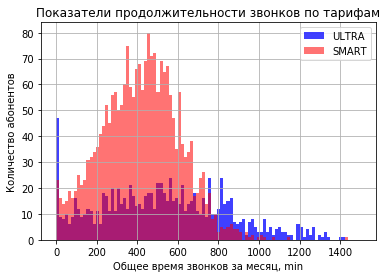

In [395]:
ultra['call_duration'].hist(bins=100, range = (0, 1500), color='b', alpha=0.75, label = 'ULTRA')
smart['call_duration'].hist(bins=100, range = (0, 1500), color='r', alpha=0.55, label = 'SMART')
plt.title("Показатели продолжительности звонков по тарифам")
plt.xlabel("Общее время звонков за месяц, min")
plt.ylabel("Количество абонентов")
plt.legend()
plt.show()

Неравномерное распределение по обоим тарифам. Подавляющее преимущество у тарифа smart по количеству звонящих в диапазоне от нуля до 750 минут.
Тариф ultra немного отыгрывает продолжительностью звонков от 750 минут, но эта доля слишком мала. 

Построим boxplots.

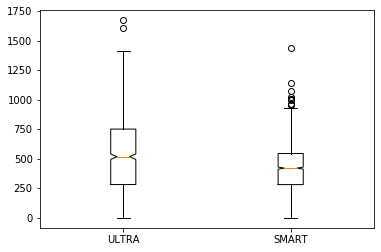

In [396]:
plt.boxplot((ultra['call_duration'], smart['call_duration']), notch=True, sym="o", labels=["ULTRA", "SMART"])
plt.show()

Два выброса у тарифа ultra около 1700 минут - незначительно. В основном значения от 320 до 750 минут.
Тариф smart имеет больше выбросов(8) от 920 минут. Диапазон между квартилями у него меньше - от 300 до 550 минут.

Посчитаем требуемые парамаетры звонков.

In [397]:
df_calls = pd.DataFrame({
     'Параметр': ['Среднее количество времени звонков', 'Дисперсия времени звонков', 'Стандартное отклонение времени звонков'],
     'Ultra': [(ultra['call_duration'].mean()), (np.var(ultra['call_duration'], ddof=1)), (np.std((ultra['call_duration'])))],
     'Smart': [(smart['call_duration'].mean()), (np.var(smart['call_duration'], ddof=1)), (np.std((smart['call_duration'])))]
})
df_calls

,Параметр,Ultra,Smart
0,Среднее количество времени звонков,526.089249,417.747534
1,Дисперсия времени звонков,101052.493549,36281.393836
2,Стандартное отклонение времени звонков,317.726307,190.434041


Тариф smart показывает меньшее количство минут и меньшую волатильность этих значений. 
Тариф ultra более предпочтителен для абонента в плане общения по телефону - возможно большее количество 
нетарифицируемых минут позволяют абоненту не торопиться в общении.


Продолжим сообщениями.

Построим гистограмму для ultra.

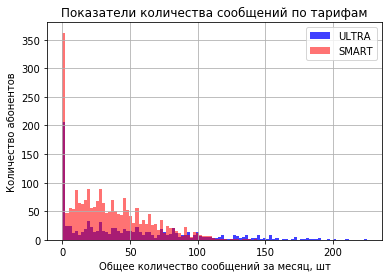

In [398]:
ultra['sms_sent'].hist(bins=100, range = (0, 225), color='b', alpha=0.75, label = 'ULTRA')
smart['sms_sent'].hist(bins=100, range = (0, 225), color='r', alpha=0.55, label = 'SMART')
plt.title("Показатели количества сообщений по тарифам")
plt.xlabel("Общее количество сообщений за месяц, шт")
plt.ylabel("Количество абонентов")
plt.legend()
plt.show()

Аналогично звонкам, сообщения в большинстве, до 100 штук, это прерогатива абонентов тарифа smart. Даже 
среди тех, кто не пользовался сообщениями, тариф smart впереди.
Абоненты ultra отыгрывают после 100 штук на человека.

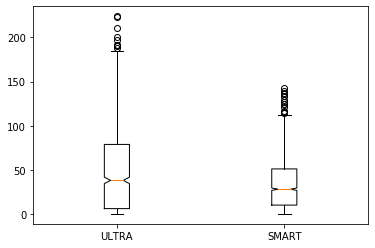

In [399]:
plt.boxplot((ultra['sms_sent'], smart['sms_sent']), notch=True, sym="o", labels=["ULTRA", "SMART"])
plt.show()

Выбросы в ultra - 3 штуки после 190. В smart их больше, от 115, 12 штук. Оба покзателя не повлияют на анализ.

Найдем требуемые параметры сообщений.

In [400]:
df_messages = pd.DataFrame({
     'Параметр': ['Среднее количество сообщений', 'Дисперсия сообщений', 'Стандартное отклонение количества сообщений'],
     'Ultra': [(ultra['sms_sent'].mean()), (np.var(ultra['sms_sent'], ddof=1)), (np.std((ultra['sms_sent'])))],
     'Smart': [(smart['sms_sent'].mean()), (np.var(smart['sms_sent'], ddof=1)), (np.std((smart['sms_sent'])))]
})
df_messages

,Параметр,Ultra,Smart
0,Среднее количество сообщений,49.313387,33.369058
1,Дисперсия сообщений,2285.417425,796.955256
2,Стандартное отклонение количества сообщений,47.781791,28.224066


Аналогично со звонками, сообщений больше отправляют абоненты тарифа ultra, возможно опять-таки из-за 
большого их количества, включенного в абонентскую плату.

Теперь интернет.

Построим гистограммы для ultra и для smart.

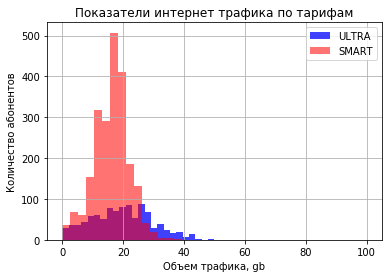

In [401]:
bins_gb_1 = ultra['gb_used'].nunique()
ultra['gb_used'].hist(bins=bins_gb_1, range = (0, 100), color='b', alpha=0.75, label = 'ULTRA')
bins_gb_2 = smart['gb_used'].nunique()
smart['gb_used'].hist(bins=bins_gb_2, range = (0, 100), color='r', alpha=0.55, label = 'SMART')
plt.title("Показатели интернет трафика по тарифам")
plt.xlabel("Объем трафика, gb")
plt.ylabel("Количество абонентов")
plt.legend()
plt.show()

Показатели тарифа Smart похожи на нормальное распределение. Здесь почти повсеместное превосходство smart над ultra, кроме трафика более 30 гигабайт. 

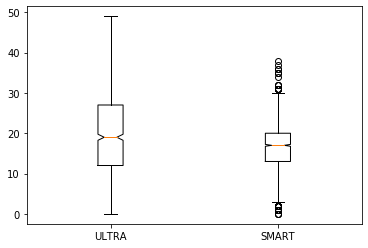

In [402]:
plt.boxplot((ultra['gb_used'], smart['gb_used']), notch=True, sym="o", labels=["ULTRA", "SMART"])
plt.show()

Один выброс в тарифе ultra и намного больше в тарифе smart - такое количество может погубить анализ, отсечем их.

In [403]:
Q1_smart = smart['revenue'].quantile(0.25)
Q3_smart = smart['revenue'].quantile(0.75)
IQR_smart = Q3_smart - Q1_smart
smart = smart.query('(@Q1_smart - 1.5 * @IQR_smart) <= revenue <= (@Q3_smart + 1.5 * @IQR_smart)')                              

Построим гистограммы для ultra и для smart еще раз, после отсечения выбросов.

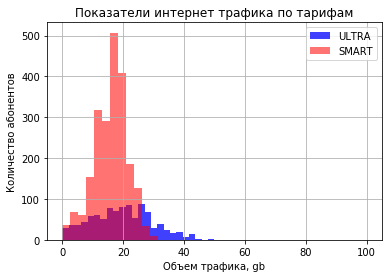

In [404]:
bins_gb_3 = ultra['gb_used'].nunique()
ultra['gb_used'].hist(bins=bins_gb_3, range = (0, 100), color='b', alpha=0.75, label = 'ULTRA')
bins_gb_4 = smart['gb_used'].nunique()
smart['gb_used'].hist(bins=bins_gb_2, range = (0, 100), color='r', alpha=0.55, label = 'SMART')
plt.title("Показатели интернет трафика по тарифам")
plt.xlabel("Объем трафика, gb")
plt.ylabel("Количество абонентов")
plt.legend()
plt.show()

Диспозиция несильно поменялась. Только появился один промежуточный пик на 10гб у тарифа smart и ultra немного отыграла позиции больше 26гб.

Выведем в таблице параметры трафика.

In [405]:
df_internet = pd.DataFrame({
     'Параметр': ['Среднее количество трафика', 'Дисперсия трафика', 'Стандартное отклонение трафика'],
     'Ultra': [(ultra['gb_used'].mean()), (np.var(ultra['gb_used'], ddof=1)), (np.std((ultra['gb_used'])))],
     'Smart': [(smart['gb_used'].mean()), (np.var(smart['gb_used'], ddof=1)), (np.std((smart['gb_used'])))]
})
df_internet

,Параметр,Ultra,Smart
0,Среднее количество трафика,19.474645,16.122328
1,Дисперсия трафика,97.378544,30.507777
2,Стандартное отклонение трафика,9.863051,5.522129


По трафику не наблюдается столь сильного расхождения в показателях, как в звонках или сообщениях. Не равны, но
ближе. Ultra имеет большую волатильность, чем smart, но меньший средний показатель.

# Шаг 4. Проверьте гипотезы

Проверим гипотезу, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.
Примем за H0 гипотезу о том что средняя выручка на этих двух тарифах равна.
H1 соответственно означает, что выручки отличаются, альтернативная гипотеза.
Мы имеем случайную выборку по абонентам. Достаточно большую, 500 абонентов, абсолютно репрезентативно.
По этой выборке мы вполне можем судить о генеральной совокупности. Соответственно, разбив эту выборку на
две по тарифам, нам все равно хватит данных, чтобы сравнить эти два тарифа проецируя на генеральную совокупность.

Определяем пороговое значение.

In [406]:
alpha = 0.05 

Прописываем тест.

In [407]:
results = st.ttest_ind(smart['revenue'], ultra['revenue']) 

Выводим на экран значение теста.

In [408]:
print('p-значение:', results.pvalue)

p-значение: 3.441776905376489e-211


Прописываем условие на проверку.

In [409]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


Выводим гисторграммы для визуального представления.

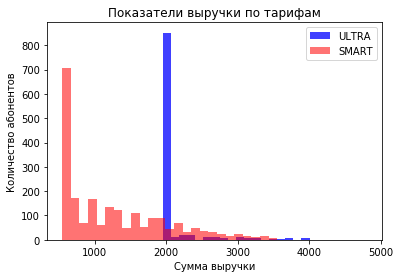

In [410]:
plt.hist(ultra['revenue'], bins=25, color='b', alpha=0.75, label = 'ULTRA')
plt.hist(smart['revenue'], bins=25, color='r', alpha=0.55, label = 'SMART')
plt.title("Показатели выручки по тарифам")
plt.xlabel("Сумма выручки")
plt.ylabel("Количество абонентов")
plt.legend()
plt.show()

Пороговое значение преодолеть не удалось, отвергаем нулевую гипотезу.
Судя по гистограмме, тариф smart несет больше выручки, чем ultra.

Теперь проверим гипотезу, что средняя выручка пользователей 
из Москвы отличается от выручки пользователей из других регионов.
Примем за H0 гипотезу о том, что выручки равны.
H1 - альтернативная гипотеза о том, что выручки не равны.

Для проверки этого создадим две таблицы - moscow и no_moscow.

p-значение: 0.5400751614511182
Не получилось отвергнуть нулевую гипотезу


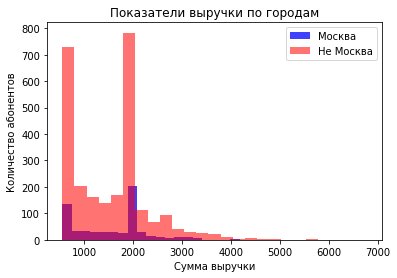

In [411]:
moscow = total_calculation.query('city == "Москва"')
no_moscow = total_calculation.query('city != "Москва"')

alpha = 0.05 
results_city = st.ttest_ind(moscow['revenue'], no_moscow['revenue']) 
print('p-значение:', results_city.pvalue)
if (results_city.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

plt.hist(moscow['revenue'], bins=25, color='b', alpha=0.75, label = 'Москва')
plt.hist(no_moscow['revenue'], bins=25, color='r', alpha=0.55, label = 'Не Москва')
plt.title("Показатели выручки по городам")
plt.xlabel("Сумма выручки")
plt.ylabel("Количество абонентов")
plt.legend()
plt.show()

Нулевую гипотезу отвергнуть не получилось, однако это совсем не означает, что средние выручки по Москве и регионам 
равны. Гистограммы также не могут дать однозначного ответа на этот вопрос, 
ведь распределение по тарифам достаточно схожее, пускай и сильно отличающееся по абсолютным цифрам.

# Итоговый вывод.

Задача исследования заключалась в том, чтобы изучить поведение клиентов и сделать заключение, какой тариф выгоднее для оператора Мегалайн. Основным параметром для заключения вывода можно принять показатель выручки и здесь тариф smart однозначно выигрывает у тарифа ultra - абоненты ultra в большинстве своем платят только абонентскую плату и нечасто пользуются услугами сверху тарифа, тогда как абоненты smart делают совершенно обратное.
Но следствием переплаты за дополнительные услуги по тарифу smart, помимо того что это банально может быть невыгодно для абонента по сравнению с тарифом ultra, обычно идут дополнительные запросы на разъяснения затрат к службе поддержки и потенциальные недовольства со стороны абонентов, а возможно и попытки смены оператора.
Поэтому считаю поставленную задачу не совсем корректной. На самом деле целью исследования должна быть не сиюминутная выгода от какого-либо тарифа, а ее комбинация вкупе с удовлетворенностью клиента. В таком случае предпочтительнее выглядит тариф ultra, ведь он дает более прогнозируемый спрос, намного более прогнозируемую выручку, а также он дает возможность оптимизации как затрат абонента, в дальнейшем при пересмотре абонентской платы, так и оптимизацию затрат оператора - сокращение штата службы поддержки и аналитического отдела по составлению тарифов(не слишком продуманный тариф smart, пускай и достаточно прибыльный).
Во времена столь быстрого научного прогресса, когда технологии всего за один год делают огромные скачки вперед, и конкурентные преимущества могут возникать из ниоткуда, крайне важным аспектом рынка b2c является лояльность клиента. И когда клиент поймет, что оператор Мегалайн заботится о расходах клиента, больше чем о своих доходах, тогда этот бизнес может играть в долгосрочную, спокойно прогнозируя выручку.